In [ ]:
# ===== 1️⃣ 載入套件 =====
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===== 2️⃣ 載入資料 =====
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# ===== 3️⃣ 檢視資料 =====
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# 前五列
display(train.head())

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

缺失值統計：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: i

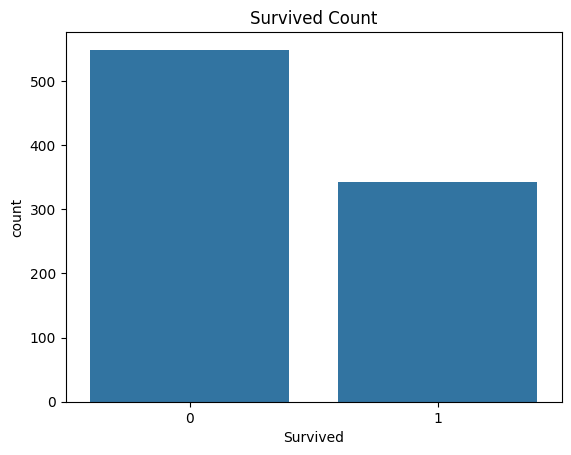

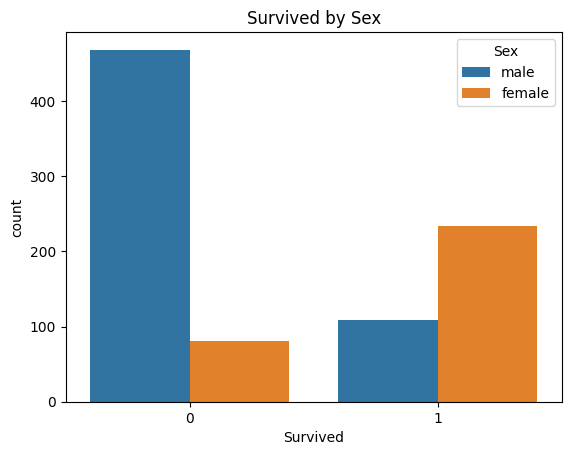

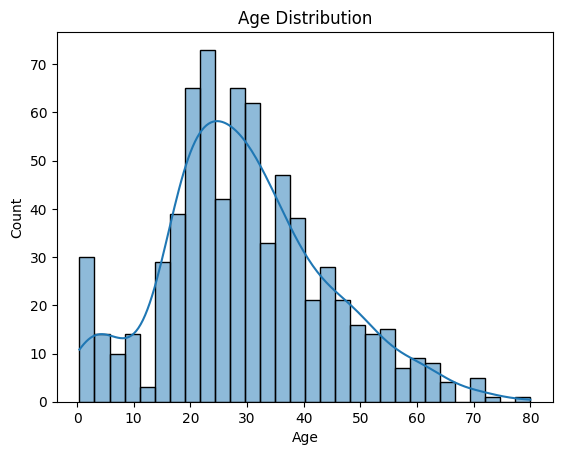

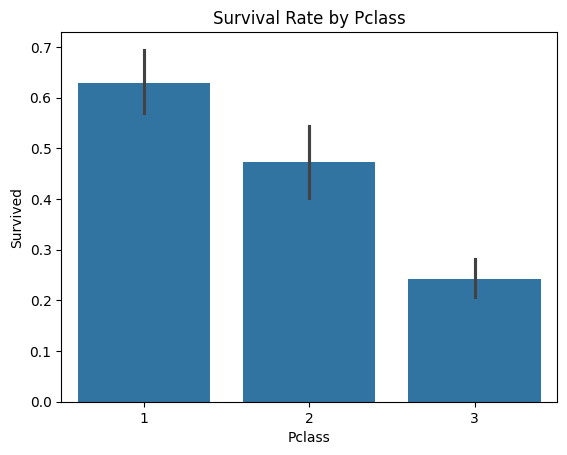

In [ ]:
# ===== 4️⃣ 基本資訊 =====
train.info()             # 欄位資料型態與缺失值
train.describe()         # 數值欄位統計
print("\n缺失值統計：")
print(train.isnull().sum())

# ===== 5️⃣ 簡單視覺化 =====
# 存活人數分布
sns.countplot(data=train, x='Survived')
plt.title('Survived Count')
plt.show()

# 性別與存活率
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survived by Sex')
plt.show()

# 年齡分布
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 艙等與存活率
sns.barplot(data=train, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.show()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



缺失值統計：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Validation Accuracy: 0.8100558659217877
Submission file created: outputs/submission.csv


C:\Users\PC\AppData\Local\Temp\ipykernel_20076\3961191933.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_20076\3961191933.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

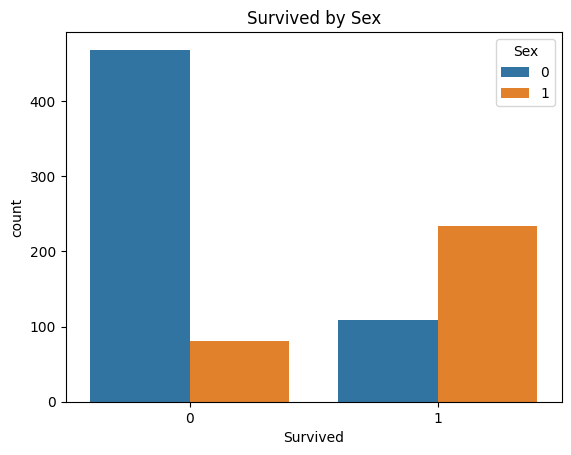

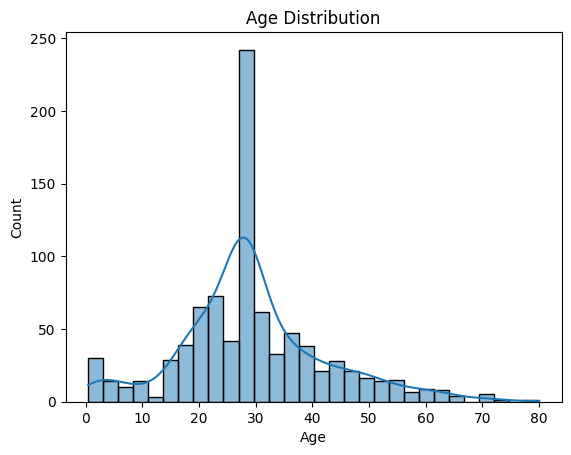

In [ ]:
# ===== 1️⃣ 載入套件 =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ===== 2️⃣ 載入資料 =====
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# ===== 3️⃣ 簡單 EDA =====
print("Train shape:", train.shape)
print("Test shape:", test.shape)
display(train.head())

print("\n缺失值統計：")
print(train.isnull().sum())

# ===== 4️⃣ 特徵處理 =====
# 補缺失值
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

# 類別轉數值
sex_map = {'male':0, 'female':1}
embarked_map = {'S':0, 'C':1, 'Q':2}

train['Sex'] = train['Sex'].map(sex_map)
test['Sex'] = test['Sex'].map(sex_map)

train['Embarked'] = train['Embarked'].map(embarked_map)
test['Embarked'] = test['Embarked'].map(embarked_map)

# 衍生特徵
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# 選擇特徵
features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize']
X = train[features]
y = train['Survived']
X_test = test[features]

# ===== 5️⃣ 分訓練集與驗證集 =====
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 6️⃣ 建立 Logistic Regression 模型 =====
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ===== 7️⃣ 驗證模型 =====
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# ===== 8️⃣ 在測試集上預測 =====
test_pred = model.predict(X_test)

# ===== 9️⃣ 生成 Kaggle submission =====
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})




In [ ]:
# 確保 outputs 資料夾存在
import os
os.makedirs("outputs", exist_ok=True)

submission.to_csv("outputs/submission.csv", index=False)
print("Submission file created: outputs/submission.csv")

# ===== 10️⃣ 可視化簡單圖表 =====
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survived by Sex')
plt.show()

sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()